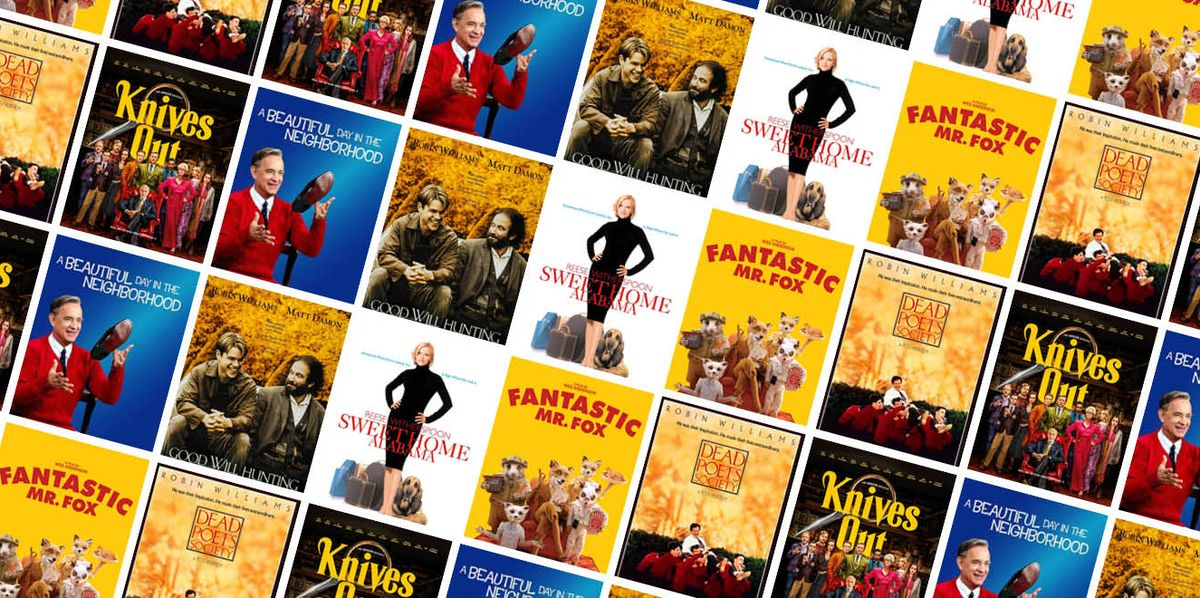

In [1]:
import numpy as np
import pandas as pd
import difflib 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

### Data collection and pre-processing

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'movie.ipynb',
 'movies.csv',
 'Project_18_Movie_Recommendation_System_using_Machine_Learning_with_Python.ipynb']

In [3]:
#loading the data from csv file to pandas dataframe
movies_data=pd.read_csv('movies.csv')

In [4]:
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
#number of row and columns in the data frame
movies_data.shape

(4803, 24)

In [6]:
movies_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [20]:
#selecting the relevant feature for recommendation

selected_feature=['genres','keywords','tagline','cast','director']

In [21]:
selected_feature

['genres', 'keywords', 'tagline', 'cast', 'director']

In [22]:
# NUll values
movies_data[selected_feature].isnull().sum()

genres      0
keywords    0
tagline     0
cast        0
director    0
dtype: int64

In [23]:
for feature in selected_feature:
    movies_data[feature]=movies_data[feature].fillna('')

In [25]:
#combining all the 5 selected features

combined_features=movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+" "+movies_data['cast']+' '+movies_data['director']

In [26]:
combined_features.shape

(4803,)

In [27]:
combined_features

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object

In [28]:
# converting the text data to feature vectors
vectorizer=TfidfVectorizer()

In [29]:
feature_vectors=vectorizer.fit_transform(combined_features)

In [31]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [32]:
# getting the similarity scores using cosine similarity

similarity=cosine_similarity(feature_vectors)

In [33]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [34]:
similarity.shape

(4803, 4803)

In [35]:
#getting the movie name from the user

movie_name=input('Enter you movie name')

Enter you movie nameIron man


In [36]:
#creatring a list with all the movie names given in the dataset

list_of_all_titles=movies_data['title'].tolist()

In [37]:
list_of_all_titles

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [38]:
#finding the close match for the movie name given by the user

find_close_match=difflib.get_close_matches(movie_name,list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [39]:
close_match=find_close_match[0]
print(close_match)

Iron Man


In [41]:
movies_data[movies_data['title']==close_match]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
68,68,140000000,Action Science Fiction Adventure,http://www.ironmanmovie.com/,1726,middle east arms dealer malibu marvel comic su...,en,Iron Man,"After being held captive in an Afghan cave, bi...",120.725053,...,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Heroes aren't born. They're built.,Iron Man,7.4,8776,Robert Downey Jr. Terrence Howard Jeff Bridges...,"[{'name': 'Sarah Finn', 'gender': 1, 'departme...",Jon Favreau


In [43]:
# finding the index of the movie with title

index_of_the_movie=movies_data[movies_data.title==close_match]['index'].values[0]

In [44]:
print(index_of_the_movie)

68


In [45]:
# getting a list of similar movies

similarity_score=list(enumerate(similarity[index_of_the_movie]))

In [46]:
print(similarity_score)

[(0, 0.033570748780675445), (1, 0.0546448279236134), (2, 0.013735500604224323), (3, 0.006468756104392058), (4, 0.03268943310073386), (5, 0.013907256685755473), (6, 0.07692837576335507), (7, 0.23944423963486405), (8, 0.007882387851851008), (9, 0.07599206098164225), (10, 0.07536074882460438), (11, 0.01192606921174529), (12, 0.013707618139948929), (13, 0.012376074925089967), (14, 0.09657127116284188), (15, 0.007286271383816743), (16, 0.22704403782296803), (17, 0.013112928084103857), (18, 0.04140526820609594), (19, 0.07883282546834255), (20, 0.07981173664799915), (21, 0.011266873271064948), (22, 0.006892575895462364), (23, 0.006599097891242659), (24, 0.012665208122549737), (25, 0.0), (26, 0.21566241096831154), (27, 0.030581282093826635), (28, 0.061074402219665376), (29, 0.014046184258938898), (30, 0.0807734659476981), (31, 0.31467052449477506), (32, 0.02878209913426701), (33, 0.13089810941050173), (34, 0.0), (35, 0.035350090674865595), (36, 0.03185325269937555), (37, 0.008024326882532318),

In [47]:
# sorting the movie based on their similarity score

sorted_similar_movies=sorted(similarity_score,key=lambda x:x[1],reverse=True)

In [52]:
sorted_similar_movies

[(68, 1.0000000000000002),
 (79, 0.40890433998005965),
 (31, 0.31467052449477506),
 (7, 0.23944423963486405),
 (16, 0.22704403782296803),
 (26, 0.21566241096831154),
 (85, 0.20615862984665329),
 (182, 0.19573956139611606),
 (511, 0.16702973947860686),
 (3623, 0.1609246088135586),
 (64, 0.15299924139445145),
 (203, 0.14818667948665118),
 (174, 0.1471993120942043),
 (4401, 0.14505971470107848),
 (101, 0.14401677581826294),
 (46, 0.14216268867232237),
 (169, 0.1380947013224906),
 (1740, 0.13624382641690763),
 (94, 0.1361681957902901),
 (788, 0.1330589507422922),
 (126, 0.13263982780511066),
 (131, 0.13137698586006535),
 (33, 0.13089810941050173),
 (2487, 0.12309731939910507),
 (783, 0.12162995562040377),
 (138, 0.11846458075866884),
 (2442, 0.11725512335483321),
 (661, 0.11719294096248463),
 (607, 0.11387063493435637),
 (38, 0.1126182690487113),
 (2651, 0.1121878787373205),
 (353, 0.1116846512704428),
 (122, 0.10850296033661253),
 (1553, 0.1079782217151326),
 (1451, 0.107849394974707),
 (

In [53]:
#print the name of similar movies based on the index
print('movies suggested for you:\n')

i=1
for movie in sorted_similar_movies:
    index=movie[0]
    title_from_index=movies_data[movies_data.index==index]['title'].values[0]
    if i<30:
        print(i,'.',title_from_index)
        i+=1
    

movies suggested for you:

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow


In [55]:
# putting all in one


movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movies_data['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : conjuring
Movies suggested for you : 

1 . The Conjuring
2 . The Conjuring 2
3 . Howards End
4 . Higher Ground
5 . Atonement
6 . Our Idiot Brother
7 . Winter's Tale
8 . The Haunting
9 . Snow White: A Deadly Summer
10 . Ramona and Beezus
11 . Marvin's Room
12 . Detention
13 . Heaven is for Real
14 . In the Heart of the Sea
15 . Salvador
16 . My Sister's Keeper
17 . Up in the Air
18 . The Time Traveler's Wife
19 . When the Lights Went Out
20 . Happiness
21 . Donnie Brasco
22 . The Greatest Game Ever Played
23 . American Beast
24 . Your Sister's Sister
25 . Bottle Shock
26 . Snitch
27 . The Immigrant
28 . 27 Dresses
29 . Won't Back Down
